<a href="https://colab.research.google.com/github/Shorubiga/Detection-and-Classification-of-Distributed-DoS-Attacks-using-Machine-Learning/blob/master/DDOS_CNN_V7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
 #%tensorflow_version 2.x
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten
from keras.layers import Convolution1D,Conv1D, Dense, Dropout, MaxPooling1D, LSTM
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from keras import callbacks
from keras.callbacks import CSVLogger
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
import numpy as np
np.random.seed(0)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD,Adam

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [39]:
#loading dataset
import pandas as pd
#x = pd.read_csv("/content/drive/My Drive/DatasetCNNDDoS/Kaggle/NetworkLog.csv", engine='python')
#y = pd.read_csv("/content/drive/My Drive/DatasetCNNDDoS/Kaggle/packet_class.csv", engine='python')
df = pd.read_csv("/content/drive/My Drive/DatasetCNNDDoS/Kaggle/NetworkLog.csv", engine='python')

In [40]:
df.drop(df[df['PKT_CLASS'] == 2].index, inplace = True)
df.drop(df[df['PKT_CLASS'] == 3].index, inplace = True)
df.drop(df[df['PKT_CLASS'] == 4].index, inplace = True)
print(df)

         SRC_ADD  DES_ADD  PKT_ID  FROM_NODE  TO_NODE  PKT_SIZE  FID  \
0           3.00    24.30  389693         21       23      1540    4   
1          15.00    24.15  201196         23       24      1540   16   
3          24.90     9.00  443135         23       21        55   10   
4          24.80     8.00  157335         23       21        55    9   
5          24.10     1.00  219350         21        1        55    2   
...          ...      ...     ...        ...      ...       ...  ...   
1048570    26.00    25.10   16432         26       25       576    1   
1048571    24.14    14.00  159164         23       22        55   15   
1048572    24.10     1.00  243700         21        1        55    2   
1048573    24.10     1.00  501948         21        1        55    2   
1048574    24.00     0.00  218032         21        0        55    1   

         SEQ_NUMBER  NUMBER_OF_PKT  NUMBER_OF_BYTE  ...    PKT_RATE  \
0             11339          16091        24780100  ...  328.240

In [41]:
df.dtypes

SRC_ADD             float64
DES_ADD             float64
PKT_ID                int64
FROM_NODE             int64
TO_NODE               int64
PKT_SIZE              int64
FID                   int64
SEQ_NUMBER            int64
NUMBER_OF_PKT         int64
NUMBER_OF_BYTE        int64
PKT_IN              float64
PKT_OUT             float64
PKT_R               float64
PKT_DELAY_NODE      float64
PKT_RATE            float64
BYTE_RATE           float64
PKT_AVG_SIZE        float64
UTILIZATION         float64
PKT_DELAY           float64
PKT_SEND_TIME       float64
PKT_RESEVED_TIME    float64
FIRST_PKT_SENT      float64
LAST_PKT_RESEVED    float64
PKT_CLASS             int64
dtype: object

In [42]:
y=df['PKT_CLASS']
x=df.drop(['PKT_CLASS'], axis=1)


In [43]:
x.head()

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,3.0,24.30,389693,21,23,1540,4,11339,16091,24780100,...,0.0,328.240918,505490.0,1540.0,0.236321,0.0,35.519662,35.550032,1.000000,50.021920
1,15.0,24.15,201196,23,24,1540,16,6274,16092,24781700,...,0.0,328.205808,505437.0,1540.0,0.236337,0.0,20.156478,20.186848,1.000000,50.030211
3,24.9,9.00,443135,23,21,55,10,12670,16085,884675,...,0.0,328.064183,18043.5,55.0,0.008437,0.0,39.617967,39.647976,1.030058,50.060098
4,24.8,8.00,157335,23,21,55,9,4901,16088,884840,...,0.0,328.113525,18046.2,55.0,0.008438,0.0,16.029803,16.059813,1.030054,50.061864
5,24.1,1.00,219350,21,1,55,2,6837,16091,885005,...,0.0,328.297902,18056.4,55.0,0.008440,0.0,21.865762,21.895771,1.030016,50.043427


In [45]:
#normalizing the data
normalized_df=(x-x.mean())/x.std()
#normalized_df=preprocessing.normalize(x)

In [ ]:
normalized_df


In [47]:
y.nunique()

2

In [48]:
y = pd.get_dummies(y,prefix=['label'])
y.head()

,['label']_1,['label']_5
0,1,0
1,1,0
3,1,0
4,1,0
5,1,0


In [49]:
y.shape


(941645, 2)

In [61]:
import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = normalized_df.corr()
corr_matrix


,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,...,PKT_DELAY_NODE,PKT_RATE,BYTE_RATE,PKT_AVG_SIZE,UTILIZATION,PKT_DELAY,PKT_SEND_TIME,PKT_RESEVED_TIME,FIRST_PKT_SENT,LAST_PKT_RESEVED
SRC_ADD,1.000000,-0.815959,-0.170401,0.479844,-0.412036,-0.339341,-0.103013,0.114136,0.204200,-0.763966,...,0.093895,0.250858,-0.748655,-0.339342,-0.763967,0.128528,-0.136951,-0.136865,-0.287591,-0.273178
DES_ADD,-0.815959,1.000000,0.176439,-0.373693,0.528549,0.350380,0.408228,0.054490,-0.363189,0.730027,...,0.076319,-0.297615,0.731996,0.350380,0.730028,0.082942,0.210533,0.210589,0.370263,0.305554
PKT_ID,-0.170401,0.176439,1.000000,-0.084247,0.088053,-0.025421,0.465311,-0.109008,-0.386835,-0.091665,...,-0.120299,-0.439332,-0.112819,-0.025420,-0.091665,-0.179451,0.921154,0.920976,0.512136,0.500053
FROM_NODE,0.479844,-0.373693,-0.084247,1.000000,0.026881,-0.159930,-0.039705,0.078354,0.088042,-0.360122,...,0.087078,0.130111,-0.349551,-0.159930,-0.360122,0.085069,-0.063896,-0.063839,-0.135255,-0.140393
TO_NODE,-0.412036,0.528549,0.088053,0.026881,1.000000,0.181077,0.223211,0.048587,-0.198178,0.374704,...,0.069818,-0.143292,0.378746,0.181077,0.374705,0.064367,0.110272,0.110314,0.194045,0.147989
PKT_SIZE,-0.339341,0.350380,-0.025421,-0.159930,0.181077,1.000000,-0.001590,-0.018046,-0.145608,0.334147,...,0.053724,-0.141505,0.463617,1.000000,0.334148,0.191593,0.029462,0.029582,0.023725,-0.095900
FID,-0.103013,0.408228,0.465311,-0.039705,0.223211,-0.001590,1.000000,-0.118804,-0.721531,-0.177661,...,-0.088905,-0.734652,-0.195061,-0.001589,-0.177660,-0.144926,0.451388,0.451262,0.869257,0.783814
SEQ_NUMBER,0.114136,0.054490,-0.109008,0.078354,0.048587,-0.018046,-0.118804,1.000000,-0.157702,-0.061474,...,0.796426,0.182107,0.015659,-0.018051,-0.061473,0.785407,0.103679,0.104234,-0.053774,-0.179056
NUMBER_OF_PKT,0.204200,-0.363189,-0.386835,0.088042,-0.198178,-0.145608,-0.721531,-0.157702,1.000000,0.264607,...,-0.180452,0.839972,0.232215,-0.145606,0.264606,-0.288905,-0.536909,-0.537059,-0.889424,-0.670679
NUMBER_OF_BYTE,-0.763966,0.730027,-0.091665,-0.360122,0.374704,0.334147,-0.177661,-0.061474,0.264607,1.000000,...,-0.058464,0.207835,0.983980,0.334148,1.000000,-0.090842,-0.139935,-0.139973,-0.225342,-0.165262


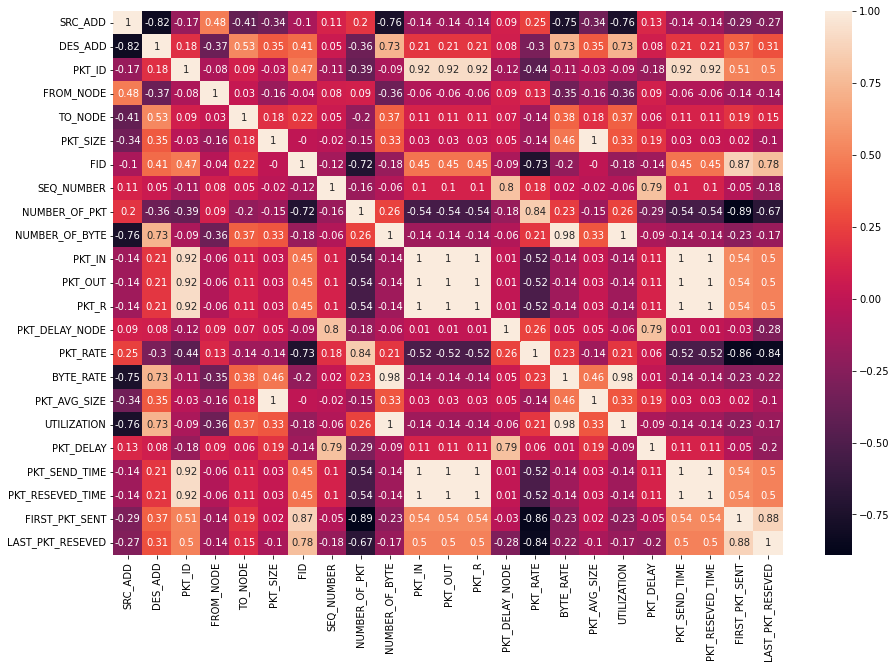

In [62]:

plt.figure(figsize=(15,10))
sn.heatmap(corr_matrix.round(2), annot=True)
plt.show()

In [58]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [63]:
corr_features = correlation(normalized_df, 0.9)
len(set(corr_features))

8

In [64]:
corr_features

{'BYTE_RATE',
 'PKT_AVG_SIZE',
 'PKT_IN',
 'PKT_OUT',
 'PKT_R',
 'PKT_RESEVED_TIME',
 'PKT_SEND_TIME',
 'UTILIZATION'}

In [65]:
normalized_df.drop(corr_features,axis=1)

,SRC_ADD,DES_ADD,PKT_ID,FROM_NODE,TO_NODE,PKT_SIZE,FID,SEQ_NUMBER,NUMBER_OF_PKT,NUMBER_OF_BYTE,PKT_DELAY_NODE,PKT_RATE,PKT_DELAY,FIRST_PKT_SENT,LAST_PKT_RESEVED
0,-1.339583,0.765865,0.400056,0.203987,0.431480,0.352689,-0.845515,-0.061506,0.517927,1.223412,-0.095439,0.438340,-0.151284,-0.486195,-0.385841
1,0.011854,0.748642,-0.603906,0.526137,0.613981,0.352689,0.349851,-0.096634,0.518166,1.223558,-0.095439,0.437958,-0.151284,-0.486195,-0.385114
3,1.126790,-0.990880,0.684696,0.526137,0.066478,-0.457664,-0.247832,-0.052275,0.516491,-0.950256,-0.095439,0.436414,-0.151284,-0.483002,-0.382494
4,1.115528,-1.105700,-0.837516,0.526137,0.066478,-0.457664,-0.347446,-0.106156,0.517209,-0.950241,-0.095439,0.436952,-0.151284,-0.483002,-0.382340
5,1.036694,-1.909439,-0.507215,0.203987,-3.583544,-0.457664,-1.044743,-0.092729,0.517927,-0.950226,-0.095439,0.438961,-0.151284,-0.483006,-0.383956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.250671,0.857721,-1.587986,1.009362,0.796482,-0.173358,-1.144357,5.833629,-1.985869,-0.735845,13.003955,4.032962,9.560304,-0.438625,-3.893639
1048571,1.041199,-0.416780,-0.827775,0.526137,0.248979,-0.457664,0.250237,-0.105774,0.520799,-0.950166,-0.095439,0.440423,-0.151284,-0.483004,-0.382505
1048572,1.036694,-1.909439,-0.377524,0.203987,-3.583544,-0.457664,-1.044743,-0.087486,0.517927,-0.950226,-0.095439,0.438961,-0.151284,-0.483006,-0.383956
1048573,1.036694,-1.909439,0.997943,0.203987,-3.583544,-0.457664,-1.044743,-0.041983,0.517927,-0.950226,-0.095439,0.438961,-0.151284,-0.483006,-0.383956


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(normalized_df, y, test_size=0.3, random_state=0)
y_train = np.array(y_train)

In [67]:
y_train = np.array(y_train)
y_test = np.array(y_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [68]:
print('xtrain={}, ytrain={}, xtest={}, ytest={}'.format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))

xtrain=(659151, 23, 1), ytrain=(659151, 2), xtest=(282494, 23, 1), ytest=(282494, 2)


In [69]:
from keras import optimizers
sgd = optimizers.SGD(learning_rate=0.009, decay=1e-6, momentum=0.9, nesterov=True)

In [70]:
model = Sequential()
model.add(Conv1D(16,2,input_shape = (X_test.shape[1], 1)))
model.add(Conv1D(16,2))
model.add(MaxPooling1D(1))

model.add(Conv1D(32,2))
model.add(Conv1D(32,2))
model.add(MaxPooling1D(1))

model.add(Conv1D(64,2))
model.add(Conv1D(64,2))
model.add(MaxPooling1D(1))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(rate=0.2))

model.add(Dense(2,activation='sigmoid'))
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer,metrics=['accuracy'])

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 22, 16)            48        
                                                                 
 conv1d_7 (Conv1D)           (None, 21, 16)            528       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 21, 16)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 20, 32)            1056      
                                                                 
 conv1d_9 (Conv1D)           (None, 19, 32)            2080      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 19, 32)           0         
 1D)                                                  

In [71]:
history = model.fit(X_train, y_train, epochs=20, batch_size=500, validation_split=0.1)

Epoch 1/20
1187/1187 [==============================] - 9s 6ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 6.6665e-04 - val_accuracy: 0.9998
Epoch 2/20
1187/1187 [==============================] - 7s 6ms/step - loss: 7.5456e-04 - accuracy: 0.9998 - val_loss: 5.6573e-04 - val_accuracy: 0.9998
Epoch 3/20
1187/1187 [==============================] - 8s 6ms/step - loss: 5.5303e-04 - accuracy: 0.9998 - val_loss: 9.1977e-04 - val_accuracy: 0.9998
Epoch 4/20
1187/1187 [==============================] - 7s 6ms/step - loss: 5.8777e-04 - accuracy: 0.9998 - val_loss: 6.8057e-04 - val_accuracy: 0.9998
Epoch 5/20
1187/1187 [==============================] - 8s 7ms/step - loss: 7.4733e-04 - accuracy: 0.9998 - val_loss: 4.6167e-04 - val_accuracy: 0.9999
Epoch 6/20
1187/1187 [==============================] - 8s 6ms/step - loss: 5.0575e-04 - accuracy: 0.9998 - val_loss: 4.4547e-04 - val_accuracy: 0.9998
Epoch 7/20
1187/1187 [==============================] - 8s 7ms/step - loss: 5.1621e-04 - acc

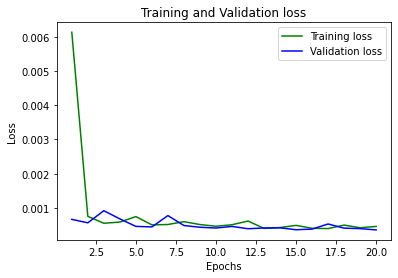

In [72]:
#training and validation loss
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

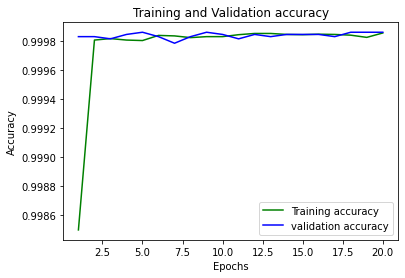

In [73]:
#Training and Validation accuracy
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
#save to folder
model.save("/content/drive/My Drive/DatasetCNNDDoS/Kaggle/Model2.h5")

In [75]:
#y_pred = m2.predict(X_test)
y_pred = model.predict(X_test)

8828/8828 [==============================] - 19s 2ms/step


In [76]:
a = (y_pred > 0.5)
b = (y_test > 0.5) 

In [77]:
b=np.argmax(y_test, axis=1)

In [78]:
a=np.argmax(y_pred, axis=1)
a[0]

0

Convolution Neural Network
Accuracy: 99.983716
Confusion Matrix =
 [[281896     11]
 [    35    552]]


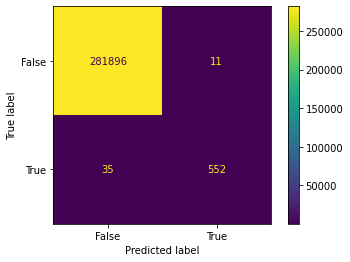

Recall = 0.9998371646831438
Classification Report =
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    281907
           1       0.98      0.94      0.96       587

    accuracy                           1.00    282494
   macro avg       0.99      0.97      0.98    282494
weighted avg       1.00      1.00      1.00    282494

F1 Score =  0.9799592081413455


In [79]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

print('Convolution Neural Network')

print('Accuracy: %f' % (accuracy_score(a, b)*100))
print("Confusion Matrix =\n", metrics.confusion_matrix(b, a, labels=None, 
                                              sample_weight=None))
confusion_matrix = metrics.confusion_matrix(b,a)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
print("Recall =", metrics.recall_score(b, a, labels=None, 
                                             pos_label=1, average='weighted', 
                                             sample_weight=None))
print("Classification Report =\n", metrics.classification_report(b, a, 
                                                                 labels=None, 
                                                                 target_names=None, 
                                                                 sample_weight=None, 
                                                                 digits=2, 
                                                                 output_dict=False))

print("F1 Score = ",f1_score(a, b, average='macro'))